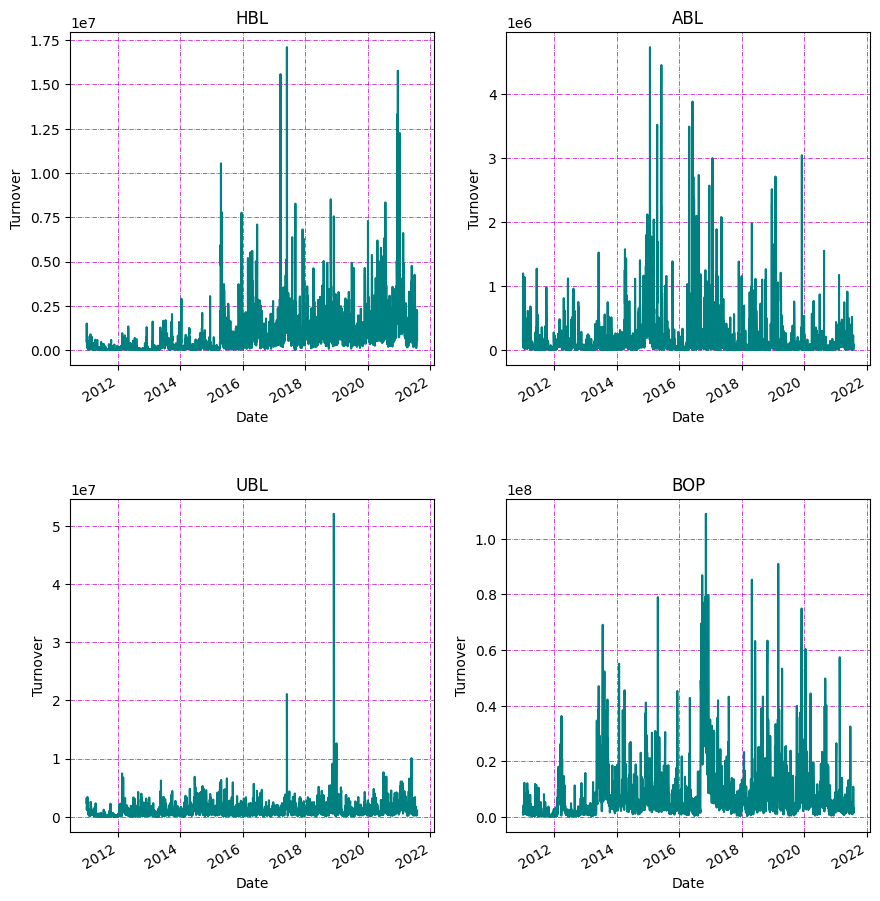

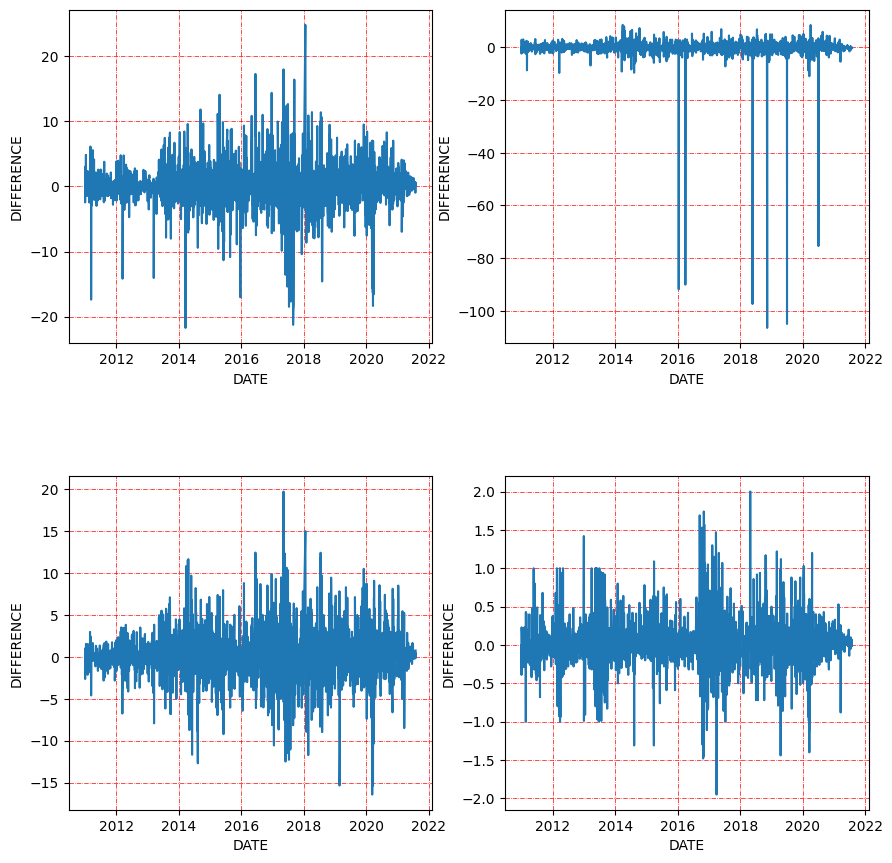

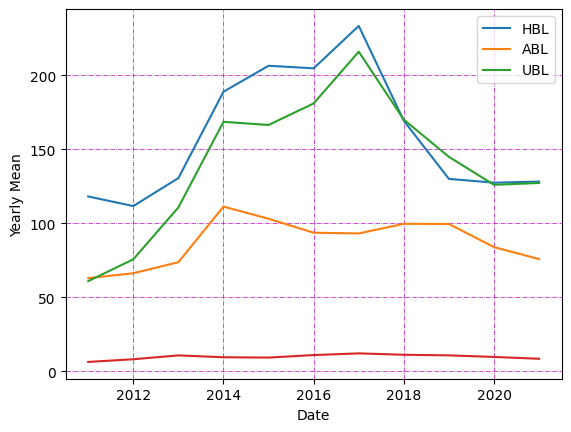

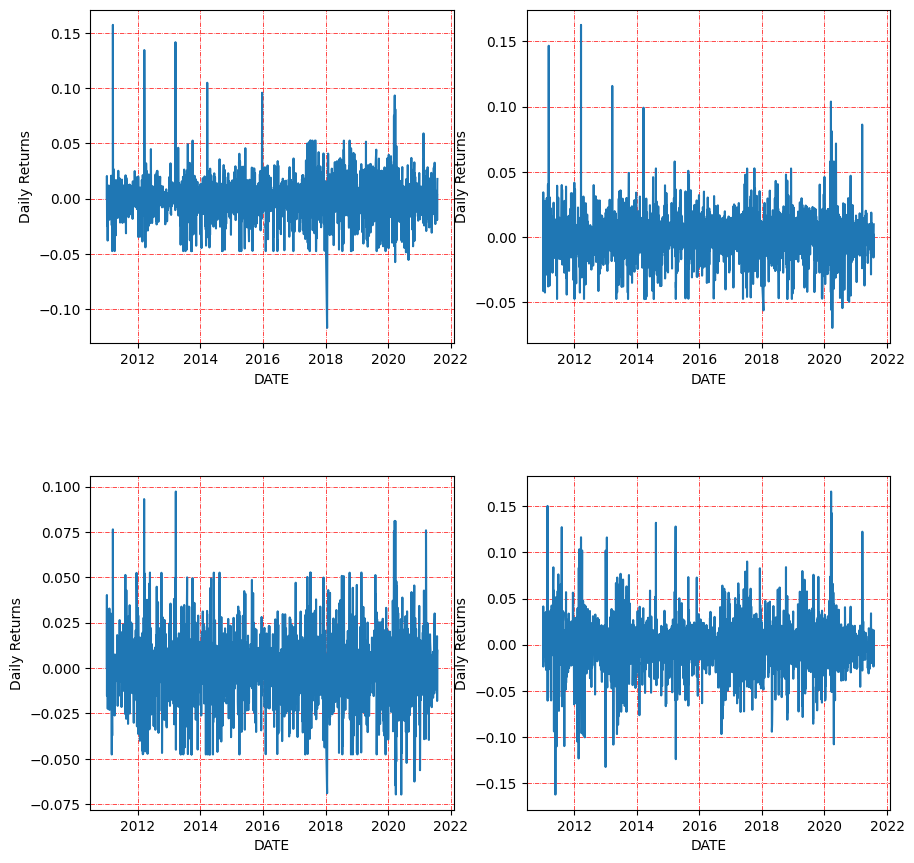

The best day of   HBL  :           Date
50 2011-03-15
The worst day of  HBL  :             Date
1725 2018-01-19
The best day of   ABL  :            Date
304 2012-03-20
The worst day of  ABL  :             Date
2247 2020-04-03
The best day of   UBL  :            Date
549 2013-03-19
The worst day of  UBL  :             Date
2306 2020-06-03
The best day of   BOP  :             Date
2258 2020-03-19
The worst day of  BOP  :            Date
101 2011-05-26
BOP was the riskiest bank over the entire time period and it is not advised to invest in it


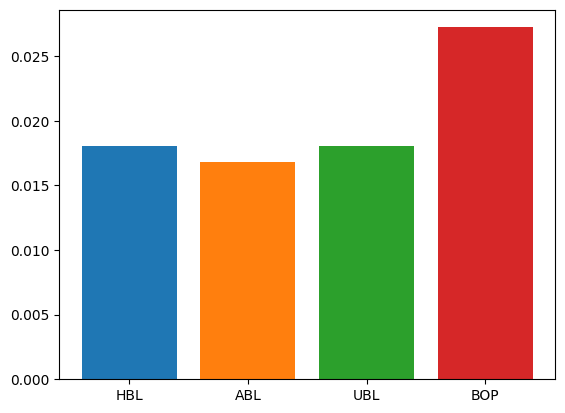

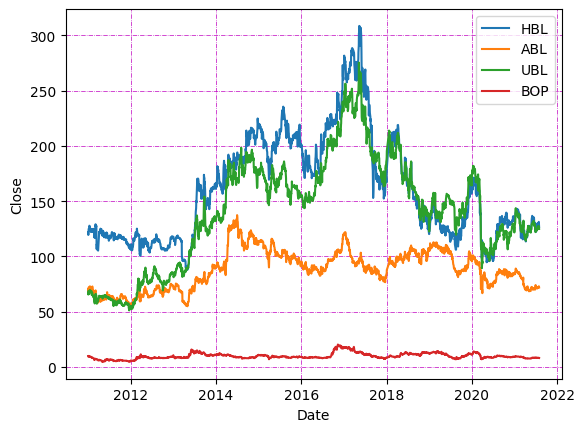

 visualization with respect to turnovers 


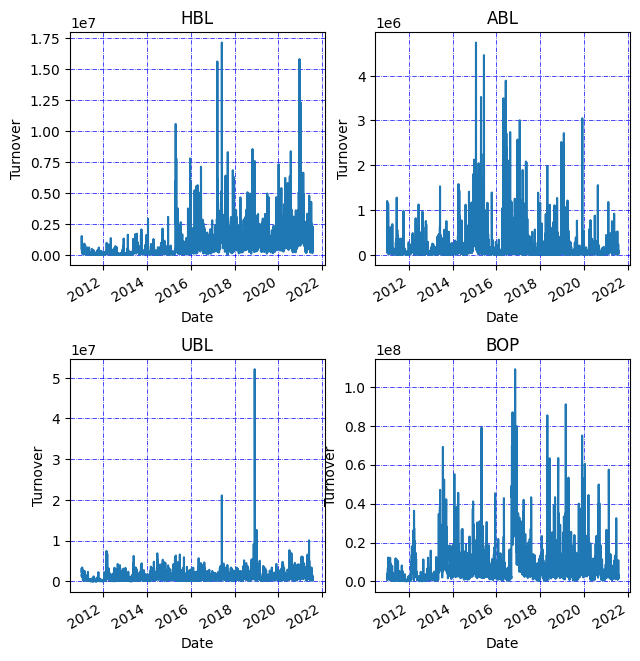

Visualizations with respect to difference between highs and lows


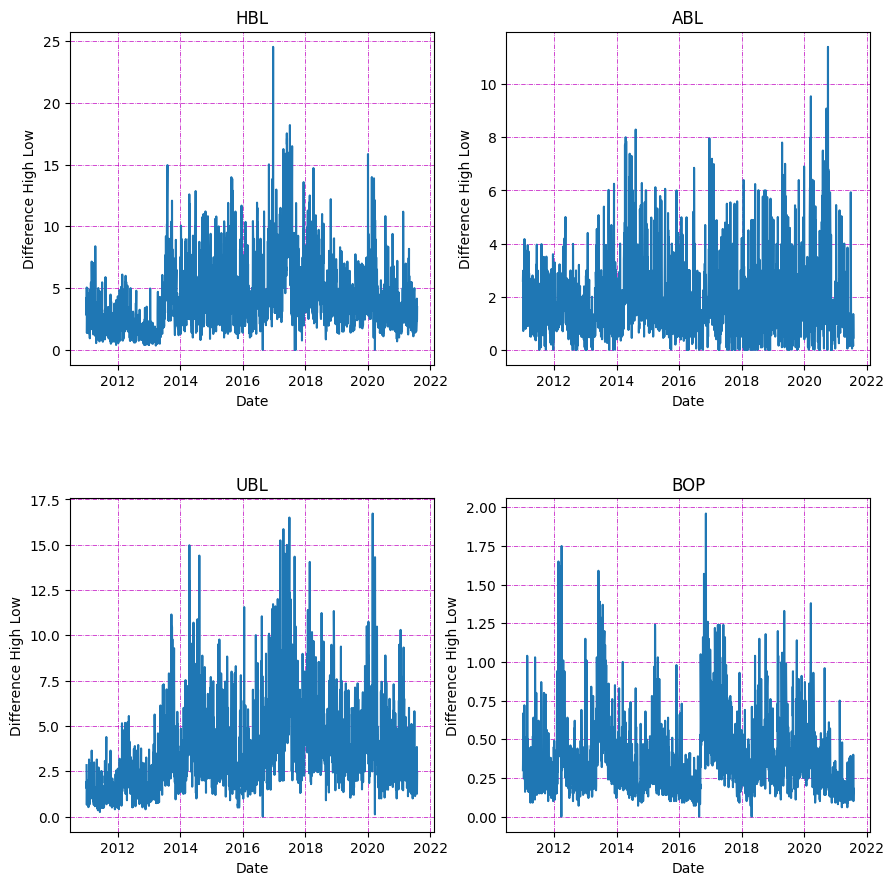

viusalization with respect to difference between open and close


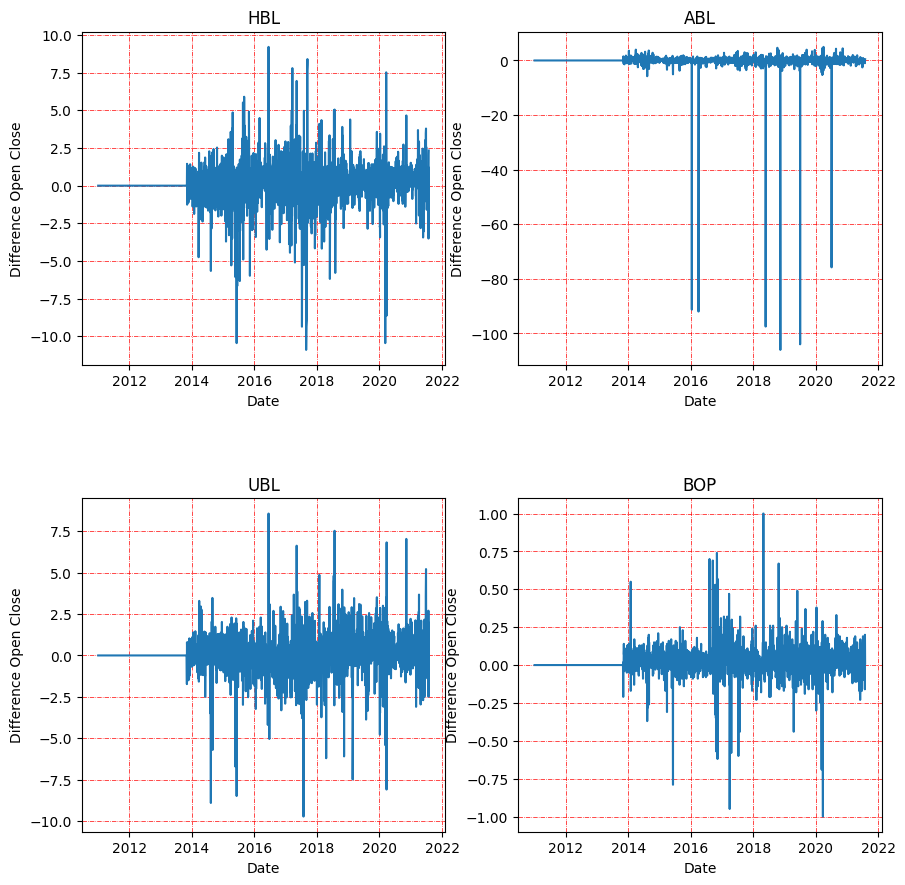

The first will provide information on the amount gathered over an extended period of time by various banks.
We can learn more about the volatility from the second graph.
The daily profit will be displayed on the third graph.


In [ ]:
import quandl
import matplotlib.pyplot as plt
import pandas as pd

quandl.ApiConfig.api_key = 'k5hpQXTQmkr3f2cBYTDb'
names_of_company = ['HBL','ABL','UBL','BOP']

con=[]

results = pd.DataFrame(con)

for names in names_of_company:
    x = quandl.get('PSX/%s' %names, start_date='2011-1-1', end_date='2022-5-1')
    x['company'] = names
    con.append(x)

# #Q1
x=len(con)

for i in range(0,x):
        w=con[i]["Turnover"]
        plt.subplot(2,2,i+1)
        w.plot(figsize=[10,10],color='teal')
        plt.xlabel('Date')
        plt.ylabel('Turnover')
        plt.title(names_of_company[i])
        plt.grid(which="major", color='m', linestyle='-.', linewidth=0.5)
        plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)
plt.show()

# #Q2
x=len(con)
x1=0
fig = plt.figure()
fig.set_size_inches(10,10)
for i in range(0,x):
        a=con[i]
        #fetch index and convert it into a separate column
        a['Date'] = a.index
        #reseting index and deleting it
        a=a.reset_index(drop=True)
        x=a['Date']
        d=con[i]['Close']
        b=con[i]['Open']
        z=len(x)
        y=[]
        for i in range(0,z):
            if(i==0):
                 y.append(b[i]-d[i])
            else:
                 y.append(b[i]-d[i-1])

        x1+=1
        plt.subplot(2,2,x1)
        plt.xlabel('DATE')
        plt.ylabel('DIFFERENCE')
        plt.plot(x,y)
        plt.grid(which="major", color='r', linestyle='-.', linewidth=0.5)
        plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)
plt.show()

# #Q3

x=len(con)
for i in range(0,x):
        a=con[i]
        #fetch index and convert it into a separate column
        a['Date'] = a.index
        #reseting index and deleting it
        a=a.reset_index(drop=True)
        x=a['Date']
        a['year'] = pd.to_datetime(x).dt.year
        a['month'] = pd.to_datetime(x).dt.month

        d=a['year'].unique()
        b=len(d)
        c=[]
        for i in range(0,b):
               c.append((a.loc[a['year']==d[i]]['Close'].mean()))
        plt.xlabel('Date')
        plt.ylabel('Yearly Mean')
        plt.grid(which="major", color='m', linestyle='-.', linewidth=0.5)
        plt.legend(['HBL','ABL','UBL','BOP'])
        plt.plot(d,c)
plt.show()

# #Q4
x=len(con)
x1=0
fig = plt.figure()
fig.set_size_inches(10,10)
for i in range(0,x):
        a=con[i]
        #fetch index and convert it into a separate column
        a['Date'] = a.index
        #reseting index and deleting it
        a=a.reset_index(drop=True)
        x=a['Date']
        d=con[i]['Close']
        z=len(x)
        y=[]
        for i in range(0,z):
            if(i==0):
                 y.append(((d[i]/d[i])-1))
            else:
                 y.append((d[i-1]/d[i])-1)
        x1+=1
        plt.subplot(2,2,x1)
        plt.plot(x,y)
        plt.xlabel('DATE')
        plt.ylabel('Daily Returns')
        plt.grid(which="major", color='r', linestyle='-.', linewidth=0.5)
        plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)
plt.show()

# #Q5
x=len(con)
for i in range(0,x):
        a=con[i]
        a['Date'] = a.index
        a=a.reset_index(drop=True)
        x=a['Date']
        z=len(x)
        d1=a['Close']
        b1=a['Close']
        y=[]
        for j in range(0,z):
                if(j==0):
                    s=b1[j]/d1[j]
                    y.append(s-1)
                else:
                    s=b1[j-1]/d1[j]
                    y.append(s-1)
        d2=a.assign(daily=y)
        t=max(y)
        print("The best day of  ",names_of_company[i]," : ",d2.loc[d2['daily']==t,['Date']])
        t=min(y)
        print("The worst day of ",names_of_company[i]," : ", d2.loc[d2['daily']==t,['Date']])

# #Q6

x=len(con)
for i in range(0,x):
    a=con[i]
    a['Date']=a.index
    a=a.reset_index(drop=True)
    a=a['Date']
    z=len(a)
    d1=con[i]['Close']
    b1=con[i]['Close']
    y=[]
    for j in range(0,z):
        if(j==0):
            c=b1[j]/d1[j]
            y.append(s-1)
        else:
            s=b1[j-1]/d1[j]
            y.append(s-1)
    d2=con[i].assign(DailyReturns=y)
    list_std=d2['DailyReturns'].std()
    plt.bar(names_of_company[i],list_std)
print('BOP was the riskiest bank over the entire time period and it is not advised to invest in it')
plt.show()

# #Q7
x=len(con)
for i in range(0,x):
        w=con[i]["Close"]
        plt.plot(w)
        plt.xlabel('Date')
        plt.ylabel('Close')
        plt.grid(which="major", color='m', linestyle='-.', linewidth=0.5)
        plt.legend(['HBL','ABL','UBL','BOP'])
plt.show()

#Q8(interesting viusalizations)

print(" visualization with respect to turnovers ")
x=len(con)
for i in range(0,x):
    plt.subplot(2,2,i+1)
    con[i]['Turnover'].plot(figsize=(7,7))
    plt.xlabel('Date')
    plt.ylabel('Turnover')
    plt.title(names_of_company[i])
    plt.grid(which="major", color='b', linestyle='-.', linewidth=0.5)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)
plt.show()


print("Visualizations with respect to difference between highs and lows")
fig = plt.figure()
fig.set_size_inches(10,10)
for i in range(0,x):
    plt.subplot(2,2,i+1)
    plt.plot(con[i]['High']-con[i]['Low'])
    plt.xlabel('Date')
    plt.ylabel('Difference High Low')
    plt.title(names_of_company[i])
    plt.grid(which="major", color='m', linestyle='-.', linewidth=0.5)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)
plt.show()

print("viusalization with respect to difference between open and close")
fig = plt.figure()
fig.set_size_inches(10,10)
for i in range(0,x):
    plt.subplot(2,2,i+1)
    plt.plot(con[i]['Open']-con[i]['Close'])
    plt.xlabel('Date')
    plt.ylabel('Difference Open Close')
    plt.title(names_of_company[i])
    plt.grid(which="major", color='r', linestyle='-.', linewidth=0.5)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)
plt.show()

print("The first will provide information on the amount gathered over an extended period of time by various banks.")
print("We can learn more about the volatility from the second graph.")
print("The daily profit will be displayed on the third graph.")
